In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [18]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [19]:
df = pd.read_excel('C:/Users/victo/Documents/Institute_of_Data/DATA/Iris.xls')

In [20]:
df.head()

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,1,0.2,1.4,3.5,5.1,Setosa
1,1,0.2,1.4,3.0,4.9,Setosa
2,1,0.2,1.3,3.2,4.7,Setosa
3,1,0.2,1.5,3.1,4.6,Setosa
4,1,0.2,1.4,3.6,5.0,Setosa


In [21]:
# strip whitespace in species_name string values
df['Species_name'] = df.Species_name.str.strip()

In [22]:
df['Species_name'].unique()

array(['Setosa', 'Versicolor', 'Verginica'], dtype=object)

In [23]:
df.Species_name.isin(['Setosa', 'Versicolor'])

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Species_name, Length: 150, dtype: bool

In [24]:
#pick two classes only, so this becomes a binary classification problem

df = df[df.Species_name.isin(['Setosa', 'Versicolor'])]
df.head()

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,1,0.2,1.4,3.5,5.1,Setosa
1,1,0.2,1.4,3.0,4.9,Setosa
2,1,0.2,1.3,3.2,4.7,Setosa
3,1,0.2,1.5,3.1,4.6,Setosa
4,1,0.2,1.4,3.6,5.0,Setosa


In [25]:
#also, we will be using only 2 features, for simple visualisation

df = df[['Petal_length', 'Sepal_length', 'Species_name']]
df.head()


,Petal_length,Sepal_length,Species_name
0,1.4,5.1,Setosa
1,1.4,4.9,Setosa
2,1.3,4.7,Setosa
3,1.5,4.6,Setosa
4,1.4,5.0,Setosa


In [26]:
df['Species_name'].unique()

array(['Setosa', 'Versicolor'], dtype=object)

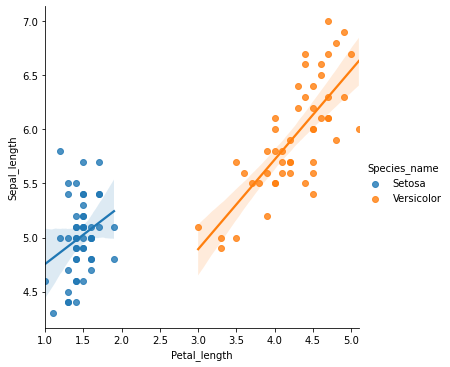

In [27]:
#visualise 2-D graph
sns.lmplot(x='Petal_length', y='Sepal_length', hue='Species_name', data=df)

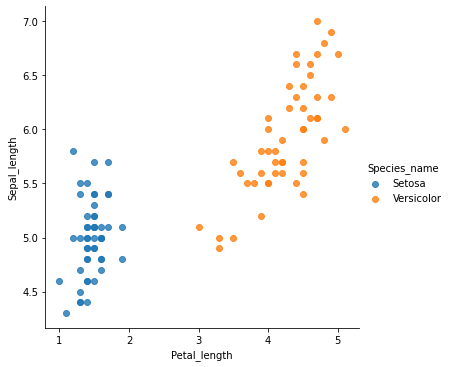

In [29]:
sns.lmplot(x='Petal_length', y='Sepal_length', hue='Species_name', data=df, fit_reg=False);

In [ ]:
from the above graph, we can infer that a linear line can be used to separate the data points

# SVM with Scikit-learn

In [30]:
df.head()

,Petal_length,Sepal_length,Species_name
0,1.4,5.1,Setosa
1,1.4,4.9,Setosa
2,1.3,4.7,Setosa
3,1.5,4.6,Setosa
4,1.4,5.0,Setosa


In [31]:
#Prepare data for computation

X = df[['Petal_length', 'Sepal_length']].values
y = df['Species_name'].values

In [32]:
X

array([[1.4, 5.1],
       [1.4, 4.9],
       [1.3, 4.7],
       [1.5, 4.6],
       [1.4, 5. ],
       [1.7, 5.4],
       [1.4, 4.6],
       [1.5, 5. ],
       [1.4, 4.4],
       [1.5, 4.9],
       [1.5, 5.4],
       [1.6, 4.8],
       [1.4, 4.8],
       [1.1, 4.3],
       [1.2, 5.8],
       [1.5, 5.7],
       [1.3, 5.4],
       [1.4, 5.1],
       [1.7, 5.7],
       [1.5, 5.1],
       [1.7, 5.4],
       [1.5, 5.1],
       [1. , 4.6],
       [1.7, 5.1],
       [1.9, 4.8],
       [1.6, 5. ],
       [1.6, 5. ],
       [1.5, 5.2],
       [1.4, 5.2],
       [1.6, 4.7],
       [1.6, 4.8],
       [1.5, 5.4],
       [1.5, 5.2],
       [1.4, 5.5],
       [1.5, 4.9],
       [1.2, 5. ],
       [1.3, 5.5],
       [1.4, 4.9],
       [1.3, 4.4],
       [1.5, 5.1],
       [1.3, 5. ],
       [1.3, 4.5],
       [1.3, 4.4],
       [1.6, 5. ],
       [1.9, 5.1],
       [1.4, 4.8],
       [1.6, 5.1],
       [1.4, 4.6],
       [1.5, 5.3],
       [1.4, 5. ],
       [4.7, 7. ],
       [4.5, 6.4],
       [4.9,

In [33]:
y

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

#OR
#from sklearn.svm import SVC
#clf = SVC(kernel='linear')

In [37]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [39]:
vector= clf.support_vectors_
vector

array([[1.9, 4.8],
       [3. , 5.1],
       [3.3, 4.9],
       [1.7, 5.4]])

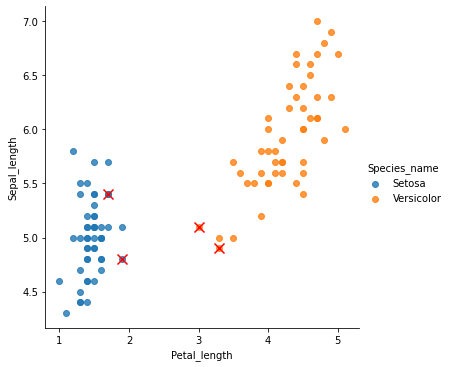

In [47]:

sns.lmplot(x='Petal_length', y='Sepal_length', hue='Species_name', data=df, fit_reg=False)
plt.scatter(vector[:,0], vector[:,1], marker='x', s=100, color='r')
plt.show()

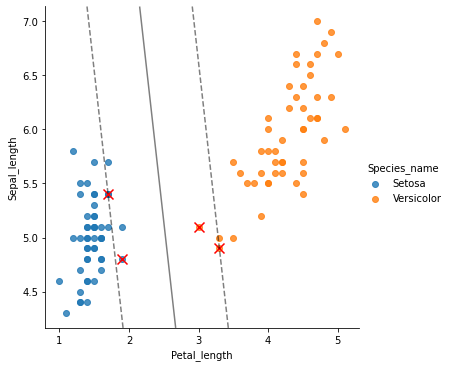

In [46]:
sns.lmplot(x='Petal_length', y='Sepal_length', hue='Species_name', data=df, fit_reg=False)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
plt.scatter(vector[:,0], vector[:,1], marker='x', s=100, color='r')
plt.show()